In [90]:
import torch
import torch.nn as nn

from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader

import matplotlib.pyplot as plt

## Exploring MNIST dataset

In [64]:
# Download/Load training dataset

dataset = MNIST(root='data/')
len(dataset)

60000

In [65]:
test_dataset = MNIST(root='data/')
len(test_dataset)

60000

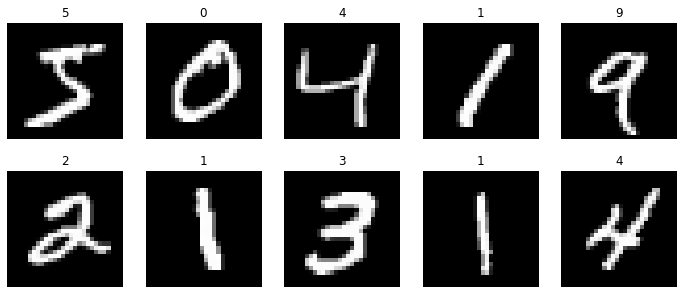

In [72]:
fig, axes = plt.subplots(2, 5, figsize=(12,5))

for i in range(10):
    axes[i//5, i%5].imshow(dataset[i][0], cmap='gray')
    axes[i//5, i%5].set_title(dataset[i][1])
    axes[i//5, i%5].axis("off")

### Loading MNIST as tensors

torch.Size([1, 28, 28])


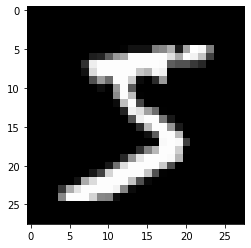

In [81]:
dataset = MNIST(root='data/', transform=transforms.ToTensor())
test_dataset = MNIST(root='data/', train=False, transform=transforms.ToTensor())

img_tensor, label = dataset[0]
print(img_tensor.shape)

plt.imshow(img_tensor[0,:,:], cmap='gray')
plt.show()

### Splitting dataset to training and validation

In [88]:
val_ratio = 1/6
train_set, val_set = random_split(dataset, [50000, 10000])

print(len(train_set), len(val_set))

50000 10000


In [3]:
train_dataset = torch.utils.data.TensorDataset(x, y)

### Creating dataloader

In [92]:
batch_size = 128

train_loader = DataLoader(train_set, batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size)

### Creating model

In [93]:
input_size = 28*28
num_classes = 10

In [229]:
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
            
    def forward(self, x):
        
        # Reshaping from 28x28 to 784, and first value (-1)
        x = x.reshape(-1, 784)
        x1 = self.linear(x)
        return x1
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                # Generate predictions
        loss = loss_function(out, labels) # Calculate loss
        return loss

In [230]:
model = Model()

In [231]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [232]:
for images, labels in train_loader:
    print("Image shape: ", images.shape)
    outputs = model(images)
    break

print("Output shape: ", outputs.shape)

Image shape:  torch.Size([128, 1, 28, 28])
Output shape:  torch.Size([128, 10])


### Softmax function

In [233]:
output_prob = nn.functional.softmax(outputs, dim = 1)

# Checking probabilities
print("Sample probabilities:\n", output_prob[0].data)

# Adding the probabilities, we get 1
print("Sum: ", torch.sum(output_prob[0]).item())

Sample probabilities:
 tensor([0.1098, 0.0934, 0.1256, 0.0957, 0.1015, 0.0791, 0.1196, 0.0877, 0.0833,
        0.1043])
Sum:  1.0000001192092896


In [234]:
# Finding label predictions with maximum probabilites
max_probs, preds = torch.max(output_prob, dim=1)

print(preds[:10],'\n')
print(max_probs.data[:10])

tensor([2, 6, 2, 6, 1, 2, 6, 0, 6, 2]) 

tensor([0.1256, 0.1218, 0.1510, 0.1391, 0.1177, 0.1501, 0.1420, 0.1418, 0.1407,
        0.1583])


In [235]:
# Comparing with actual labels
labels[:10]

tensor([2, 1, 3, 2, 7, 2, 8, 0, 8, 9])

### Evaluation metric

In [236]:
torch.sum(preds==labels)

tensor(19)

In [237]:
# Accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [238]:
accuracy(output_prob, labels)

tensor(0.1484)

### Loss function

In [241]:
loss_function = nn.functional.cross_entropy

print(loss_function(output_prob, labels))

tensor(2.2993, grad_fn=<NllLossBackward>)


### Optimizer

In [242]:
learning_rate = 0.05
sgd = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Training

In [243]:
# Utility function to train the model

def fit(epochs, model, optimizer, train_loader, val_loader):
    
    # For recording epoch wise results
    history = []
    
    for i in range(epochs):
        for batch in train_loader:
            
            # Make prediction & Calculate loss
            
            loss = model.training_step(batch)
            
            history.append(loss.detach())
            
            # Compute gradients
            loss.backward()
            
            # Update parameters using gradients
            optimizer.step()
            
            # Reset gradients to zero
            optimizer.zero_grad()
            
    return history

In [244]:
hist = fit(2, model, sgd, train_loader, val_loader)

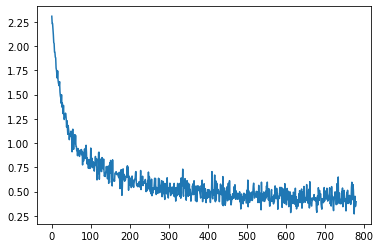

In [246]:
plt.plot(hist)

In [11]:
y_pred = model(x).detach().numpy().reshape(-1,)
print("Target values :\n",y,'\n')
print("Predicted values :\n")

for i in y_pred:
    print('{:.3f}'.format(i))

Target values :
 tensor([[0.],
        [0.],
        [0.],
        [1.]]) 

Predicted values :

0.000
0.040
0.040
0.944
